## Import Libraries

In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

## Sin Signal

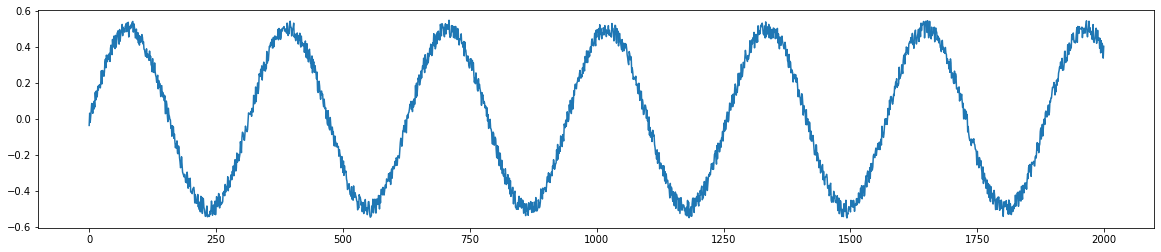

In [2]:
N = 2000
t = np.arange(0,N)
sin_data = np.sin(0.02*t)/2 + np.random.uniform(-0.05,0.05,N)
plt.figure(figsize=(20,4))
plt.plot(sin_data)
plt.show()

## Convert Signal To Dataset

In [3]:
def convertSignalToDataset(signal,step):
    X,Y = [],[]
    for i in range(len(signal)-step):
        j = i+step
        X.append(signal[i:j])
        Y.append(signal[j])
        
    X,Y = np.array(X), np.array(Y)
    return torch.Tensor(X[...,np.newaxis]), torch.Tensor(Y[...,np.newaxis])

In [4]:
X_train = sin_data[:1500]
X_test = sin_data[1500:]

In [5]:
X_train, Y_train = convertSignalToDataset(X_train,15)
X_test , Y_test = convertSignalToDataset(X_test,15)

## Model
## RNN

In [6]:
class RNN(nn.Module):
    def __init__(self,input_size,hidden_size,num_layers,num_classes):
        super().__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.rnn = nn.RNN(input_size=input_size,hidden_size=hidden_size,num_layers=num_layers,batch_first=True)
        self.fc = nn.Linear(hidden_size,num_classes)
        
    def forward(self,x):
        h_0 = torch.zeros(self.num_layers,x.size(0),self.hidden_size)
        
        x,_ = self.rnn(x,h_0)
        x = x[:,-1,:]
        x = self.fc(x)
        
        return x

In [7]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = RNN(input_size=1,hidden_size=64,num_layers=1,num_classes=1).to(device)

In [8]:
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)
loss_function = nn.MSELoss()

In [9]:
for epoch in range(250):
    model.train()
    optimizer.zero_grad()
    predict = model(X_train)
    loss = loss_function(predict,Y_train)
    loss.backward()
    optimizer.step()
    print(f"Epochs: {epoch+1}, Loss: {loss}")

Epochs: 1, Loss: 0.11578721553087234
Epochs: 2, Loss: 0.10886257886886597
Epochs: 3, Loss: 0.1023782342672348
Epochs: 4, Loss: 0.09617554396390915
Epochs: 5, Loss: 0.09003490954637527
Epochs: 6, Loss: 0.0837649330496788
Epochs: 7, Loss: 0.07729549705982208
Epochs: 8, Loss: 0.07062863558530807
Epochs: 9, Loss: 0.0637689009308815
Epochs: 10, Loss: 0.056670352816581726
Epochs: 11, Loss: 0.04919092357158661
Epochs: 12, Loss: 0.04117240384221077
Epochs: 13, Loss: 0.032584961503744125
Epochs: 14, Loss: 0.023595841601490974
Epochs: 15, Loss: 0.014606878161430359
Epochs: 16, Loss: 0.0064787790179252625
Epochs: 17, Loss: 0.0017268090741708875
Epochs: 18, Loss: 0.005657400470227003
Epochs: 19, Loss: 0.014232469722628593
Epochs: 20, Loss: 0.014218914322555065
Epochs: 21, Loss: 0.008790407329797745
Epochs: 22, Loss: 0.003819423960521817
Epochs: 23, Loss: 0.0016311807557940483
Epochs: 24, Loss: 0.0017065422143787146
Epochs: 25, Loss: 0.0027837136294692755
Epochs: 26, Loss: 0.004024213179945946
Epoc

Epochs: 209, Loss: 0.001190134440548718
Epochs: 210, Loss: 0.0011889550369232893
Epochs: 211, Loss: 0.0011877568904310465
Epochs: 212, Loss: 0.0011865401174873114
Epochs: 213, Loss: 0.0011853041360154748
Epochs: 214, Loss: 0.0011840485967695713
Epochs: 215, Loss: 0.0011827734997496009
Epochs: 216, Loss: 0.0011814780300483108
Epochs: 217, Loss: 0.0011801623040810227
Epochs: 218, Loss: 0.0011788260890170932
Epochs: 219, Loss: 0.001177468802779913
Epochs: 220, Loss: 0.0011760905617848039
Epochs: 221, Loss: 0.001174691366031766
Epochs: 222, Loss: 0.00117327063344419
Epochs: 223, Loss: 0.0011718287132680416
Epochs: 224, Loss: 0.0011703654890879989
Epochs: 225, Loss: 0.0011688809609040618
Epochs: 226, Loss: 0.001167375361546874
Epochs: 227, Loss: 0.0011658489238470793
Epochs: 228, Loss: 0.001164301997050643
Epochs: 229, Loss: 0.0011627349304035306
Epochs: 230, Loss: 0.001161148538812995
Epochs: 231, Loss: 0.0011595430551096797
Epochs: 232, Loss: 0.0011579195270314813
Epochs: 233, Loss: 0.001

## Predict

In [10]:
model.eval()
pred_train = model(X_train)
pred_train = pred_train.data.numpy()
pred_test = model(X_test)
pred_test = pred_test.data.numpy()
nan_data = np.ones((1500,1)) * np.nan
pred_test = np.concatenate((nan_data,pred_test),axis=0)

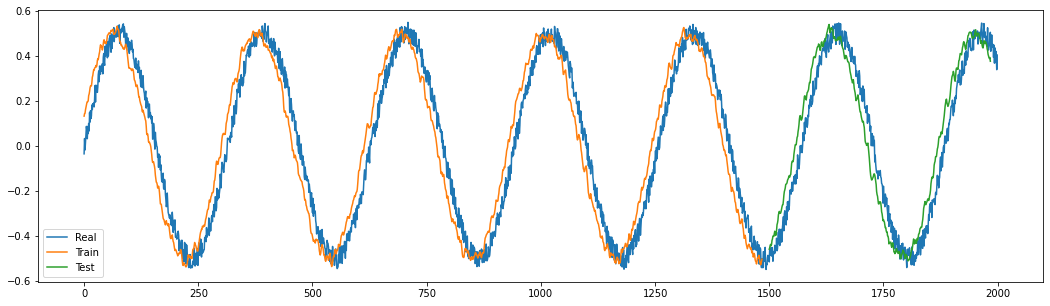

In [11]:
plt.figure(figsize=(18,5))
plt.plot(sin_data,label="Real")
plt.plot(pred_train,label="Train")
plt.plot(pred_test,label="Test")
plt.legend()
plt.show()